# Pandas #



In [1]:
import pandas as pd

In [19]:
trends = pd.read_csv('./data/20160819_OlympicSportsByCountries.csv', header=1)
trends.head()

,Country,Search Interest,Sport
0,Iran,1,Archery
1,South Korea,2,Archery
2,Mexico,1,Archery
3,Netherlands,1,Archery
4,Aruba,16,Artistic gymnastics


In [12]:
trends[trends.Country == "Spain"].sort_values(by="Search Interest", ascending=False)

,Country,Search Interest,Sport
1240,Spain,19,Tennis
1035,Spain,9,Swimming
222,Spain,7,Athletics (Track & Field)
428,Spain,6,Basketball
49,Spain,5,Artistic gymnastics
378,Spain,3,Badminton
486,Spain,1,Beach volleyball
518,Spain,1,Canoeing
538,Spain,1,Cycling
591,Spain,1,Diving


In [20]:
trends[trends.Sport == "Tennis"].sort_values(by="Search Interest", ascending=False).head()

,Country,Search Interest,Sport
1312,Puerto Rico,78,Tennis
1202,Argentina,38,Tennis
1339,Uruguay,24,Tennis
1240,Spain,19,Tennis
1291,Montenegro,16,Tennis


In [35]:
interesting_sports = pd.DataFrame([(sport, len(data)) for sport, data in trends.groupby("Sport")])
interesting_sports.columns=["Sport", "Countries interested"]
interesting_sports.sort_values(by="Countries interested", ascending=False)

,Sport,Countries interested
2,Athletics (Track & Field),201
24,Swimming,190
1,Artistic gymnastics,163
13,Football (Soccer),161
28,Tennis,150
4,Basketball,69
9,Diving,64
17,Judo,55
8,Cycling,46
3,Badminton,38


In [41]:
trends[trends.Sport == "Trampolining"]

,Country,Search Interest,Sport
1347,Canada,1,Trampolining


Rosie McLennan (Canadá) ganó el oro femenino en gimnasia de trampolín

In [49]:
medalists = pd.read_csv('./data/Summer Olympic medallists 1896 to 2008 - ALL MEDALISTS.csv', header=4)
medalists.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [52]:
medalists[medalists.NOC == 'ESP']

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
306,Paris,1900,Basque Pelota,Basque Pelota,"De AMEZOLA y ASPIZUA, José",ESP,Men,cesta punta,M,Gold
307,Paris,1900,Basque Pelota,Basque Pelota,"VILLOTA BAQUIOLA, Francisco",ESP,Men,cesta punta,M,Gold
3315,Antwerp,1920,Football,Football,"ACEDO, Domingo",ESP,Men,football,M,Silver
3316,Antwerp,1920,Football,Football,"ARABOLAZA, Patricio",ESP,Men,football,M,Silver
3317,Antwerp,1920,Football,Football,"ARRATE, Mariano",ESP,Men,football,M,Silver
3318,Antwerp,1920,Football,Football,"ARTOLA, Juan",ESP,Men,football,M,Silver
3319,Antwerp,1920,Football,Football,"BELAUTEGUIGOITIA LANDALUCE, Jose",ESP,Men,football,M,Silver
3320,Antwerp,1920,Football,Football,"BILBAO, Sabino",ESP,Men,football,M,Silver
3321,Antwerp,1920,Football,Football,"EQUIAZABAL, Ramon",ESP,Men,football,M,Silver
3322,Antwerp,1920,Football,Football,"GIL, Ramon Moncho",ESP,Men,football,M,Silver


<IPython.core.display.Javascript object>


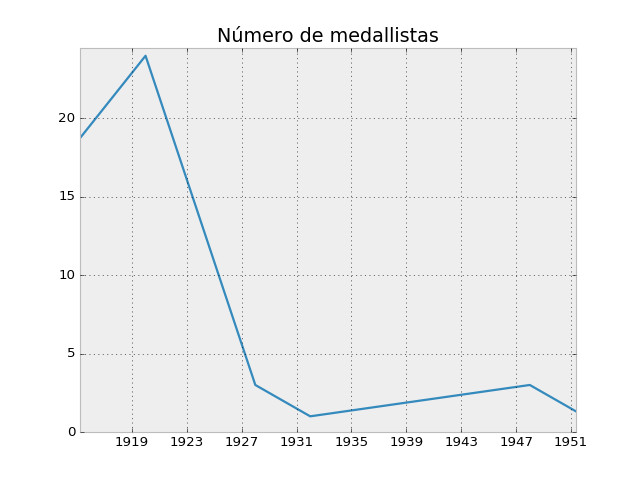

In [67]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
from datetime import date
%matplotlib notebook

medalists_list = list()
for edition, data in medalists[medalists.NOC == 'ESP'].groupby('Edition'):
    medalists_list.append((date(year=edition, month=1, day=1), len(data)))
    
timevol = pd.Series([pair[1] for pair in medalists_list], index=[pair[0] for pair in medalists_list])
timevol.plot(title='Número de medallistas')